# Importing the required libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import optimizers
from keras.utils import plot_model
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.metrics import confusion_matrix, classification_report

# NOTE: The warnings are coming just because this project is using the deprecated version of tensorflow

# Building our Neural Network Model

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(200,(3,3),input_shape = (128,128,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(100,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Displaying the summary of the Model

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 200)     5600      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 100)       180100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)               

# Displaying the structure of the Model

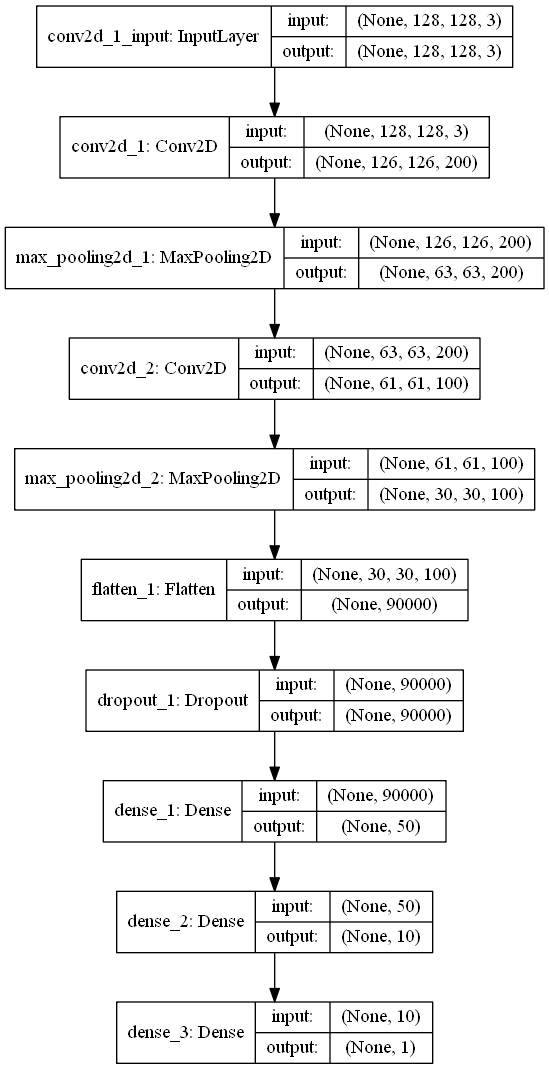

In [5]:
plot_model(model,show_shapes = True)

# Loading the weights of the model

In [6]:
model.load_weights('48epoch.h5')

# Testing the model onto the real data

In [7]:
category = {1:'WithMask',0:'WithoutMask'}
color_dict = {1:(0,255,0), 0:(0,0,255)}

# opening the link to the webcam
cap = cv2.VideoCapture(0)

# loading the face detecting haar cascade xml file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    # capturing the frame from the video stream
    _, frame = cap.read()
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    # detecting the faces from the captured frame
    faces = face_cascade.detectMultiScale(gray,1.1,5)

    # Fetching the coordinates of the face
    for x,y,w,h in faces:
        # Fetching the face part of the image only from the original frame
        face_img = frame[y:y+h,x:x+w]

        # Resized the icaptured frame to the appropriate input size of the model
        resized = cv2.resize(face_img,(128,128))

        # reshaping the input array of image to match the proper format of input to the model
        reshaped_arr = np.reshape(resized,(1,128,128,3))
    
        # normalizing the values in the input image array
        img_arr = reshaped_arr/255.0

        # predicting the class of the input image
        int_class = model.predict_classes(img_arr)

        # getting the label for the corresponding predicted class
        label_class = category[int_class[0,0]]

        # Drawing a rectangle over the region of interest area and placing the appropriate label
        frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        frame = cv2.rectangle(frame,(x,y-50),(x+w,y),color_dict[int_class[0,0]],-1)
        frame = cv2.putText(frame,label_class,(x,y-25),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    # Displaying each of the captured frame after formatting
    cv2.imshow('Image',frame)

    # Close the windows only when the ESC key is pressed
    key = cv2.waitKey(1)
    if key == 27:
        break

# closing the link to the webcam
cap.release()
cv2.destroyAllWindows()